In [5]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import seaborn as sns
from sklearn.datasets import fetch_openml
import sys
import os
import site
sys.path.append(os.path.join(os.path.dirname(site.getsitepackages()[0]), "site-packages"))

# Словесное описание задачи

Этот датасет представляет собой практику методов парсинга веб-сайта ИКЕА в Саудовской Аравии для категории мебели. Ссылка на извлеченный веб-сайт: https://www.ikea.com/sa/en/cat/furniture-fu001/

Данные запрошены до 20.04.2020.

Задачей будет предсказать, превысит ли товар стоимость в SR 1000, основываясь на имеющихся данных.

# Чтение данных

In [6]:
data_raw = pd.read_csv("C:/Users/dmitr/Downloads/chrome/IKEA.csv")

Таблица содержит данные о мебели, продаваемой фирмой IKEA в Саудовской Аравии. Для каждого товара указаны его наименование, категория (виды мебели), цена (в саудовских риялах), ссылка на веб-страницу с товаром, краткое описание и т.д.

In [7]:
data_raw

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0


### Содержание таблицы
- item_id: идентификатор предмета;
- name: коммерческое наименование товаров;
- category: категория мебели, к которой принадлежит данный предмет (диваны, кровати, стулья и т. д.);
- price: текущая цена в саудовских риалах, указанная на веб-сайте по состоянию на 20.04.2020;
- old_price: цена товара в саудовских риалах до скидки
- short_description: краткое описание товара;
- designer: имя дизайнера, создавшего предмет;
- width: Ширина предмета в сантиметрах;
- height: Высота предмета в сантиметрах;
- depth: Глубина предмета в сантиметрах;
- sellable_Online: если товар доступен для покупки в Интернете или только в магазинах (логическое значение);
- other_colors: логическое да, если для элемента доступны другие цвета, нет - если другие цвета не доступны;
- link: веб-ссылка на товар.

Определим количество строк таблицы (каждая строка соответствует одному товару) и количество столбцов.

In [8]:
data_raw.shape

(3694, 14)

# Визуализация данных

В таблице присутствует столбец с номером товара. Удалим его, так как при импорте датасета автоматически создался ещё один столбец с номерами.

In [9]:
del data_raw['Unnamed: 0']

### Обработка пропущенных значений

В таблице присутствуют пропущенные значения в столбцах width, height и depth. Заполнить пробелы своими данными мы не можем, так как размер предмета нельзя вычислить по другим признакам. Удалим строки с пропущенными значениями.

Так же добавим в таблицу столбец price > 1000, заполним его основываясь на сравнении цены с 1000 в столбце price.

Выведем таблицу на экран.

In [11]:
data_raw = data_raw.dropna(subset=['width'])
data_raw = data_raw.dropna(subset=['height'])
data_raw = data_raw.dropna(subset=['depth'])

data_raw['price > 1000'] = data_raw['price']>1000

data_raw

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,price > 1000
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,False
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,False
5,10122647,INGOLF,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0,False
6,70404875,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0,False
8,50406465,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683,39329299,PAX / FORSAND/VIKEDAL,Wardrobes,1260.0,No old price,True,https://www.ikea.com/sa/en/p/pax-forsand-viked...,Yes,"Wardrobe combination, 75x60x2...",Ehlén Johansson/IKEA of Sweden,60.0,201.0,75.0,True
3684,49157565,ELVARLI,Wardrobes,1245.0,"SR 1,735",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 165x55x216 cm",Ehlén Johansson/IKEA of Sweden,55.0,216.0,164.0,True
3685,59324936,PAX / FORSAND,Wardrobes,2100.0,No old price,True,https://www.ikea.com/sa/en/p/pax-forsand-wardr...,Yes,"Wardrobe combination, 100x60x...",IKEA of Sweden/Ehlén Johansson,60.0,236.0,100.0,True
3686,69330475,PAX / HOKKSUND,Wardrobes,3985.0,No old price,True,https://www.ikea.com/sa/en/p/pax-hokksund-ward...,No,"Wardrobe combination, 150x66x...",IKEA of Sweden/Ehlén Johansson,66.0,236.0,150.0,True


Перейдём к получении информации для каждого количественного признака. Для этого вызываем метод describe:

In [32]:
data_raw.describe()

,item_id,price,depth,height,width
count,1.899000e+03,1899.000000,1899.000000,1899.000000,1899.000000
mean,4.880518e+07,1220.626962,56.156398,113.109531,119.751975
std,2.915014e+07,1422.088876,30.579497,62.748882,77.515205
min,1.165950e+05,6.000000,1.000000,2.000000,2.000000
25%,2.034380e+07,295.000000,40.000000,71.000000,60.000000
50%,4.927859e+07,680.000000,47.000000,92.000000,93.000000
75%,7.043965e+07,1589.000000,60.000000,171.000000,161.500000
max,9.990379e+07,9585.000000,257.000000,301.000000,420.000000


В выведенной таблице приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

Построим график зависимости размера мебели и цены. Размер (в кубических сантиметрах) вычисляется построчным умножением столбцов width, height и depth.

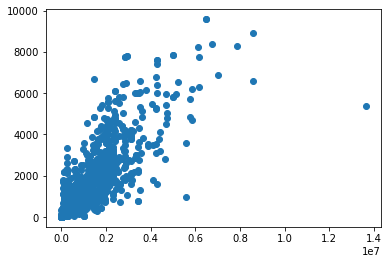

In [14]:
volume = data_raw['width']*data_raw['height']*data_raw['depth']
plt.scatter(volume, data_raw['price'])
pass

Можем получить среднее значение размера товаров.

In [16]:
volume.mean()

910690.0674038968

### Корреляция
Корреляция — вероятностная или статистическая зависимость. Возникает тогда, когда зависимость одного из признаков от другого осложняется наличием ряда случайных факторов.

Визуально представим матрицу корреляции. Чем темнее цвет клетки, тем больше коэффициент корреляции - число, показывающее степень тесноты корреляции.

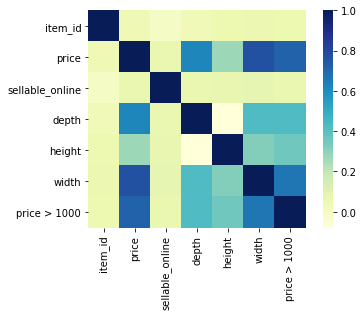

In [17]:
sns.heatmap(data_raw.corr(), square = True, cmap = "YlGnBu")
pass
#есть штуки с достаточно большим коэффициентом корелляции

Можно заметить несколько достаточно тёмных клеток. Это значит, что в датасете присутствуют коррелирующие признаки. Если не считать столбец price>1000, то заметно, что цена в основном зависит от размеров товара.

# Обработка признаков

Сперва избавимся от столбцов, не играющих важной роли в исследовании. 

In [19]:
del data_raw['link']
del data_raw['short_description']
del data_raw['old_price']
del data_raw['designer']

In [20]:
data_raw

,item_id,name,category,price,sellable_online,other_colors,depth,height,width,price > 1000
3,80155205,STIG,Bar furniture,69.0,True,Yes,50.0,100.0,60.0,False
4,30180504,NORBERG,Bar furniture,225.0,True,No,60.0,43.0,74.0,False
5,10122647,INGOLF,Bar furniture,345.0,True,No,45.0,91.0,40.0,False
6,70404875,FRANKLIN,Bar furniture,129.0,True,No,44.0,95.0,50.0,False
8,50406465,FRANKLIN,Bar furniture,129.0,True,No,44.0,95.0,50.0,False
...,...,...,...,...,...,...,...,...,...,...
3683,39329299,PAX / FORSAND/VIKEDAL,Wardrobes,1260.0,True,Yes,60.0,201.0,75.0,True
3684,49157565,ELVARLI,Wardrobes,1245.0,True,No,55.0,216.0,164.0,True
3685,59324936,PAX / FORSAND,Wardrobes,2100.0,True,Yes,60.0,236.0,100.0,True
3686,69330475,PAX / HOKKSUND,Wardrobes,3985.0,True,No,66.0,236.0,150.0,True


Выделим для дальнейшего использования числовые признаки.

In [21]:
num_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(num_columns)

['item_id', 'price', 'sellable_online', 'depth', 'height', 'width', 'price > 1000']


### Обработка категориальных признаков

В датасете имеются категориальные(номинальные) признаки. Их значения определяют факт принадлежности к какой-то категории. С помощью fit_transform() закодируем каждое значение типа Оbject.

In [22]:
from sklearn import preprocessing
data_describe = data_raw.describe(include = [object])
number = preprocessing.LabelEncoder()
data_raw["name"] = number.fit_transform(data_raw["name"])
data_raw["category"] = number.fit_transform(data_raw["category"])
data_raw

,item_id,name,category,price,sellable_online,other_colors,depth,height,width,price > 1000
3,80155205,235,0,69.0,True,Yes,50.0,100.0,60.0,False
4,30180504,176,0,225.0,True,No,60.0,43.0,74.0,False
5,10122647,108,0,345.0,True,No,45.0,91.0,40.0,False
6,70404875,66,0,129.0,True,No,44.0,95.0,50.0,False
8,50406465,66,0,129.0,True,No,44.0,95.0,50.0,False
...,...,...,...,...,...,...,...,...,...,...
3683,39329299,193,16,1260.0,True,Yes,60.0,201.0,75.0,True
3684,49157565,54,16,1245.0,True,No,55.0,216.0,164.0,True
3685,59324936,192,16,2100.0,True,Yes,60.0,236.0,100.0,True
3686,69330475,198,16,3985.0,True,No,66.0,236.0,150.0,True


Столбцы sellable_online, price > 1000 и other_colors содержат только по две категории. Следовательно для них можем провести бинаризацию. 

In [24]:
data_raw['sellable_online'] = pd.factorize(data_raw['sellable_online'])[0]

In [25]:
data_raw['price > 1000'] = pd.factorize(data_raw['price > 1000'])[0]

In [27]:
data_raw['other_colors'] = pd.factorize(data_raw['other_colors'])[0]
data_raw

,item_id,name,category,price,sellable_online,other_colors,depth,height,width,price > 1000
3,80155205,235,0,69.0,0,0,50.0,100.0,60.0,0
4,30180504,176,0,225.0,0,1,60.0,43.0,74.0,0
5,10122647,108,0,345.0,0,1,45.0,91.0,40.0,0
6,70404875,66,0,129.0,0,1,44.0,95.0,50.0,0
8,50406465,66,0,129.0,0,1,44.0,95.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...
3683,39329299,193,16,1260.0,0,0,60.0,201.0,75.0,1
3684,49157565,54,16,1245.0,0,1,55.0,216.0,164.0,1
3685,59324936,192,16,2100.0,0,0,60.0,236.0,100.0,1
3686,69330475,198,16,3985.0,0,1,66.0,236.0,150.0,1


Теперь в столбце sellable_online значениям True соответствует 0, значениям False - 1, в столбце other_colors значениям Yes соответствует 0, значениям No - 1, в столбце price>1000 значениям False соответствует 0, значениям True - 1.

# Нормализация

Нормализация для количественных признаков нам необходима, так как для классификации мы будем использовать метод ближайших соседей. Этот метод чувствителен к к масштабированию данных. Приведем все значения к нулевому среднему и единичному стандартному отклонению.

In [29]:
data_num = data_raw[num_columns]
data_num = (data_num - data_num.mean(axis = 0))/data_num.std(axis = 0)

In [47]:
data_num.describe()

,item_id,price,sellable_online,depth,height,width,price > 1000
count,1.899000e+03,1.899000e+03,1.899000e+03,1.899000e+03,1.899000e+03,1.899000e+03,1.899000e+03
mean,-8.360289e-17,-1.206103e-16,-1.410609e-15,3.535876e-16,4.513387e-17,1.707136e-16,-2.340647e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.670269e+00,-8.541147e-01,-8.300160e-02,-1.803705e+00,-1.770701e+00,-1.519082e+00,-7.926625e-01
25%,-9.763720e-01,-6.508925e-01,-8.300160e-02,-5.283409e-01,-6.710802e-01,-7.708420e-01,-7.926625e-01
50%,1.624027e-02,-3.801640e-01,-8.300160e-02,-2.994293e-01,-3.364129e-01,-3.451191e-01,-7.926625e-01
75%,7.421736e-01,2.590366e-01,-8.300160e-02,1.256921e-01,9.225737e-01,5.385785e-01,1.260907e+00
max,1.752945e+00,5.881751e+00,1.204162e+01,6.567917e+00,2.994324e+00,3.873408e+00,1.260907e+00


# Разбиение на обучающую и тестовую выборки

Будем использовать все входные признаки кроме item_id.

In [30]:
X = data_raw.drop('item_id', axis = 1) 
y = data_raw['item_id']
new_id = X.columns
new_id

Index(['name', 'category', 'price', 'sellable_online', 'other_colors', 'depth',
       'height', 'width', 'price > 1000'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Получили обучающую выборку размерностью:

In [33]:
X_train.shape

(1519, 9)

и тестовую выборку размерностью:

In [34]:
X_test.shape

(380, 9)

# Классификатор ближайших соседей

Метод основан на предположении о том, что близким объектам в пространстве призанков соответствуют похожие метки. Для нового объекта метод предполагает найти ближайшие к нему объекты и построить прогноз по их меткам.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracy_train = []
accuracy_test = []
neighb_count = []

for k in range(10, 51, 5):
    model = KNeighborsClassifier(algorithm='brute', n_neighbors = k, n_jobs = -1)
    model.fit(X_train, y_train)
    neighb_count.append(k)
    accuracy_train.append(accuracy_score(y_train, model.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test, model.predict(X_test)))

Обработали все случаи от 10 соседей до 300 с шагом = 10. Все полученные значения представим на графике.

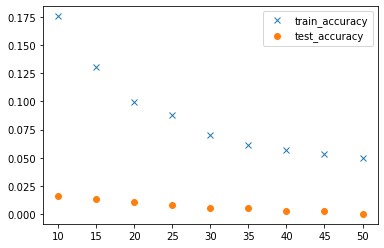

In [49]:
plt.plot(neighb_count, accuracy_train, 'x', neighb_count, accuracy_test, 'o')
plt.legend(['train_accuracy', 'test_accuracy'])
plt.show()

Из графика видно, что чем больше количество соседей, тем больше точность тестовой выборки.

# Вывод

В ходе этой работы:
- была поставлена задача классификации
- были прочитаны и визуализированы данные, вычислены основные характеристики;
- были обработаны пропущенные значения;
- были обработаны категориальные значения;
- была проведена нормализация количественных данных;
- данные были разбиты на обучающую и тестовую выборки;
- был запущен классификатор ближайших соседей на разном количестве соседей.